In [68]:
import os
import glob
import mdai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mdai_labelled_data_get import mdai_labelled_data_get, LabelledOCTImagesMDAI

import warnings
warnings.filterwarnings('ignore')

# First try pulling data from md.AI

Dec 09 2022: The latest code is kept in /scripts, this is just a demo.
</br>

Sign into md.AI Client

In [69]:
DOMAIN = "stanford.md.ai"
PROJECT_ID = "LzBgWbB3"
TOKEN = os.environ.get('MDAI_TOKEN')

mdai_client = mdai.Client(domain=DOMAIN, access_token=TOKEN)

# download the annotation data for a specific group (by label group id)
label_group_id_drusen     = "L_A1yzbN"
label_group_id_hlines     = "L_R6vQZN"

p = mdai_client.project(
    PROJECT_ID, 
    path='.', 
    annotations_only=True,
    label_group_id=label_group_id_drusen)

# assuming the latest json is the right json
json_files = os.getcwd() + '/*.json'  
latest_file = max(glob.glob(json_files), key=os.path.getctime)
results = mdai.common_utils.json_to_dataframe(latest_file)
annots = results['annotations'] # dataframe

Successfully authenticated to stanford.md.ai.
Using working directory for data.
Preparing annotations export for project LzBgWbB3...                                                
Using cached annotations data for project LzBgWbB3.
No project created. Downloaded annotations only.


## Retrieves the labels from the project specified earlier

- Stores meta data for each label in a csv_file.
- Stores the binarized labelled OCT images in specified root_dir.

In [70]:
csv_file = mdai_labelled_data_get(
    annots,
    root_dir='mdai_labelled_data_masks')

A_gBJW8g did not have any vertices data.
A_ge9Bog did not have any vertices data.
A_L4qREg did not have any vertices data.
Time elapsed: 7.9 seconds 
Bad files found: 3


### Create a Dataset that's somewhat compatible with PyTorch

In [73]:
plt.ion()   # makes it interactive

oct_sample = LabelledOCTImagesMDAI(
    csv_file='mdai_labelled_data_meta.csv', 
    root_dir='mdai_labelled_data_masks')

Visualize what the data looks like.

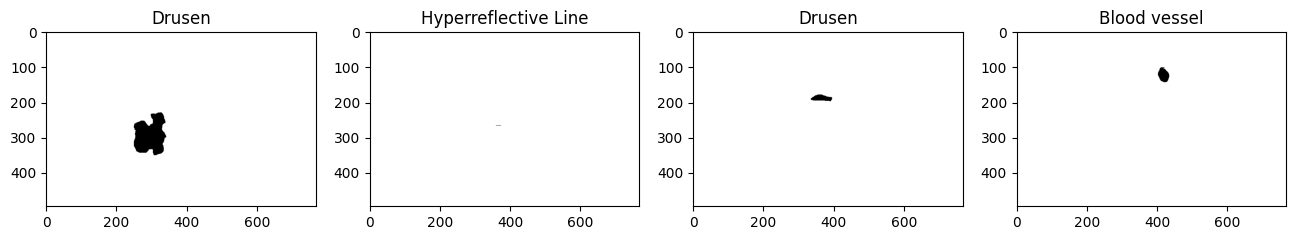

In [74]:
stride = 500
n_plot = int(np.ceil(oct_sample.__len__()/stride))

f, ax = plt.subplots(1, n_plot, figsize=(n_plot*4,4))
n = 0
for i in range(oct_sample.__len__()):
    if (i%stride == 0):
        ax[n].imshow(oct_sample[i]['image'], cmap='binary')
        ax[n].set_title(oct_sample[i]['label'])
        n += 1
plt.show()